<a href="https://colab.research.google.com/github/emilyolafson/3d-cnn/blob/main/Dataset_processing_%2B_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Emily Olafson

In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from sklearn import preprocessing
import sklearn
import scipy.io as sio
import csv
from google.colab import drive
import tensorflow as tfz
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### **Load raw data (.pkl files) and save as lists**

  

In [ ]:
# Kuceyeski Connectome Dataset
# load ChaCo scores & EDSS and save for future use

subid_edss = np.loadtxt('/content/drive/My Drive/ML project/Data/Kuceyeski Connectome data/MSConnect_SUBID_EDSS.csv', delimiter =',', dtype=str)
id=subid_edss[:,0]  
alldata=[]
for i in range(0,81):
  data = np.loadtxt(str('/content/drive/My Drive/ML project/Data/Kuceyeski Connectome data/SUB_' + id[i] + '_T2FLAIR_lesion_label_toMNI1mm_nemo_output_chacovol_fs86subj_mean.pkl_fs86.csv'), delimiter = ',')
  alldata.append(data)

with open("/content/drive/My Drive/ML project/Data/Kuceyeski Connectome data/allsubs_chaco.pkl", "wb") as output:
    pickle.dump(alldata, output)


In [ ]:
# QSM dataset
subid = np.loadtxt('/content/drive/My Drive/ML project/Data/QSM lesion data/QSM_SUBID.csv', delimiter =',', dtype=str)
id=subid  

alldata_QSM=[]
for i in range(0,96):
  data = np.loadtxt(str('/content/drive/My Drive/ML project/Data/QSM lesion data/SUB_' + id[i]+'_fs86.csv'), delimiter = ',')
  alldata_QSM.append(data)

with open("/content/drive/My Drive/ML project/Data/QSM lesion data/allsubs_chaco.pkl", "wb") as output:
    pickle.dump(alldata_QSM, output)

In [ ]:
# Load and process Kuceyeski Connectome Dataset
with open("/content/drive/My Drive/ML project/Data/Kuceyeski Connectome data/allsubs_chaco.pkl", "rb") as data:
    chaco = pickle.load(data)

column_names=['SUBID', 'EDSS', 'Sex', 'Age', 'Ethnicity']

raw_data_kc= pd.read_csv('/content/drive/My Drive/ML project/Data/Kuceyeski Connectome data/DemographicMSConnect.csv', names=column_names, na_values="?", sep=",", skipinitialspace=True)
dataset_kc=raw_data_kc.copy()

chaco=pd.DataFrame(chaco) # turns into matrix.

#merge ChaCo scores with demographic variables
dataset_kc=pd.concat((dataset_kc,chaco), axis=1)

dataset_kc['SUBID']=range(0,81)

# ensure age and EDSS are numeric columns
dataset_kc['Age']=pd.to_numeric(dataset_kc['Age'])
dataset_kc['EDSS']=pd.to_numeric(dataset_kc['EDSS'])

#save as .csv
dataset_kc.to_csv('/content/drive/My Drive/ML project/Data/compiledData_KuceyeskiMSConnect.csv')

    SUBID  EDSS Sex  Age  ...        82        83        84        85
0       0   0.0   F   37  ...  0.000283  0.010720  0.001385  0.004965
1       1   1.0   F   52  ...  0.000861  0.004427  0.000292  0.002590
2       2   0.0   M   54  ...  0.005767  0.000240  0.003930  0.002058
3       3   1.0   F   64  ...  0.013449  0.000448  0.001038  0.007692
4       4   1.5   M   45  ...  0.027493  0.017524  0.001449  0.007489
..    ...   ...  ..  ...  ...       ...       ...       ...       ...
76     76   2.0   F   64  ...  0.024752  0.000513  0.003187  0.010132
77     77   0.0   F   25  ...  0.049674  0.002039  0.009799  0.010008
78     78   3.0   F   52  ...  0.023332  0.000620  0.007341  0.005359
79     79   2.0   F   32  ...  0.026483  0.000709  0.002482  0.002607
80     80   1.0   F   24  ...  0.003801  0.015854  0.004330  0.003962

[81 rows x 91 columns]


In [ ]:
#Load and processes QSM dataset
with open("/content/drive/My Drive/ML project/Data/QSM lesion data/allsubs_chaco.pkl", "rb") as data:
    chaco = pickle.load(data)

raw_data_qsm=pd.read_csv('/content/drive/My Drive/ML project/Data/QSM lesion data/QSM_demographic_w_age.csv', delimiter =',', dtype=str)
dataset_qsm=raw_data_qsm.copy()
dataset_qsm=dataset_qsm.drop_duplicates(subset=['ID'],keep='last')

dataset_qsm.pop("Date of MRI")
dataset_qsm.pop("Timepoint")
dataset_qsm.pop("Treatment")
dataset_qsm.pop("Disease Duration")
dataset_qsm.pop("Treatment Duration")
dataset_qsm.pop("Lesion #")
dataset_qsm.pop("QSM_Baseline")
dataset_qsm.pop("Rim_Baseline_FINAL")
dataset_qsm.pop("Vol_Baseline (cc)")
dataset_qsm.pop("QSM Value")
dataset_qsm.pop("DOB")

dataset_qsm.index=range(0,96)
dataset_qsm=dataset_qsm[['ID', 'EDSS', 'Gender', 'Age', 'Race']]
dataset_qsm.rename(columns={'Gender':'Sex', 'Race':'Ethnicity', 'ID':'SUBID'}, inplace=True)
dataset_qsm=dataset_qsm.replace(to_replace={'Caucasian':'white', 'African American':'black or african american', 'Asian':'asian', 'Other':'other combinations not described', 'Hispanic':'hispanic'}, value=None)

# ensure age and EDSS are numeric columns
dataset_qsm['Age']=pd.to_numeric(dataset_qsm['Age'])
dataset_qsm['EDSS']=pd.to_numeric(dataset_qsm['EDSS'])

chaco=pd.DataFrame(data=chaco) # turns into matrix.

#merge ChaCo scores with demographic variables
dataset_qsm=pd.concat((dataset_qsm,chaco), axis=1)

#save as .csv
dataset_qsm.to_csv('/content/drive/My Drive/ML project/Data/compiledData_QSM.csv')

In [ ]:
# Merge QSM and Kuceyeski Connectome data
dataset=pd.concat([dataset_kc,dataset_qsm])
dataset.index=range(0,177)
dataset.to_csv('/content/drive/My Drive/ML project/Data/compiledData_2datasets_QSM_MSConnect.csv')

### **Briefly visualize/summarize data**


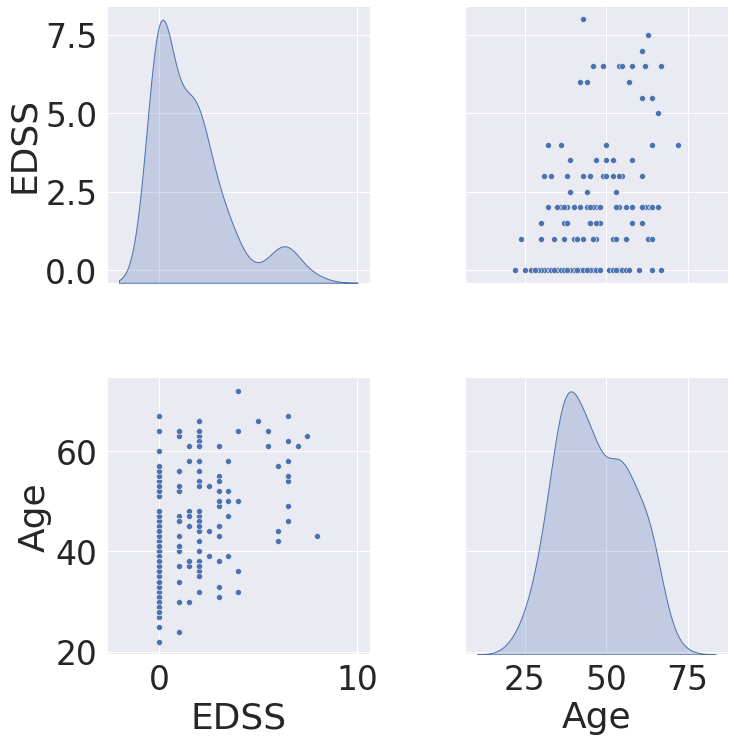

In [ ]:
sns.pairplot(dataset[["EDSS", "Age"]],diag_kind="kde")
plt.gcf().set_size_inches(14, 14)
sns.set(font_scale=3)  

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EDSS,177.0,1.604520,1.911859,0.000000e+00,0.000000,1.000000,2.000000,8.000000
Age,177.0,46.316384,10.930120,2.200000e+01,38.000000,45.000000,55.000000,72.000000
0,177.0,0.001881,0.003437,2.605889e-06,0.000131,0.000350,0.001557,0.016730
1,177.0,0.007097,0.006568,2.300915e-05,0.001798,0.005099,0.010361,0.029870
2,177.0,0.014955,0.016034,2.101270e-06,0.003257,0.009813,0.021335,0.072316
...,...,...,...,...,...,...,...,...
81,177.0,0.011997,0.013682,6.463297e-07,0.002390,0.007013,0.015778,0.076420
82,177.0,0.025430,0.034055,7.954658e-07,0.001812,0.011258,0.033601,0.138190
83,177.0,0.005909,0.011361,1.870759e-07,0.000317,0.001313,0.005054,0.079842
84,177.0,0.009133,0.011185,3.201399e-07,0.001617,0.005106,0.013401,0.102864


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

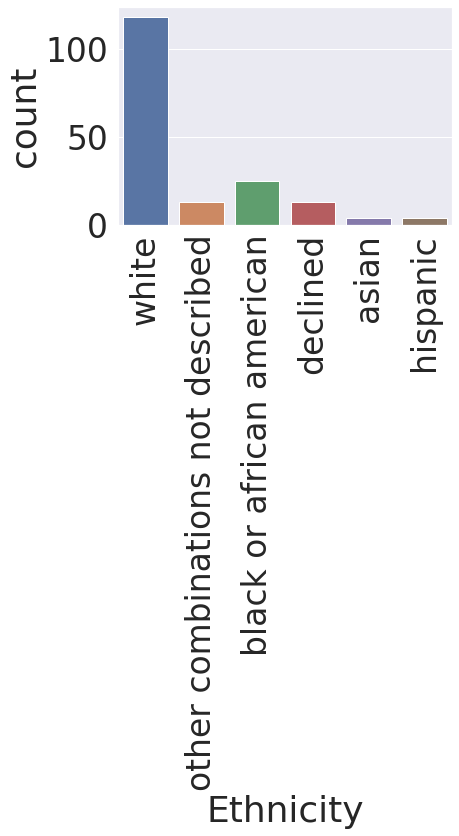

In [ ]:
sns.countplot(x="Ethnicity", data=dataset, orient="h")
sns.set(font_scale=3)  
plt.xticks(rotation=90)